In [160]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from sklearn.metrics import r2_score
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation # animation



In [2]:
datadir ='/Users/francesco/Desktop/Data/'

# Read the dataframes
df = pd.read_csv(datadir + 'Merged_Integrated_melt_rates.csv')
df_err = pd.read_csv(datadir + 'Merged_Integrated_melt_err_rates_second_method.csv')

In [3]:
#extracting the variables from the dataset


#Name of the glaciars in the error file
NameError = df_err.values[:,0]
print(NameError.shape)

#Measument years
Years = df.columns[1:].values.astype(int)
print(Years[1])  #PROBLEM: the second year is not 1993, but 1994

#Melt rates
Melting_rates = df.values[:,1:]
Melting_rates = np.array(Melting_rates, dtype=np.float32)

Glacier = df.values[:,0]
print(Glacier[0])
print(Glacier.shape)

errors = df_err.values[:,1:]
errors = np.array(errors, dtype=np.float32)
errors[0,0]
print(errors.shape)

(183,)
1994
Dawson_Lambton
(183,)
(183, 25)


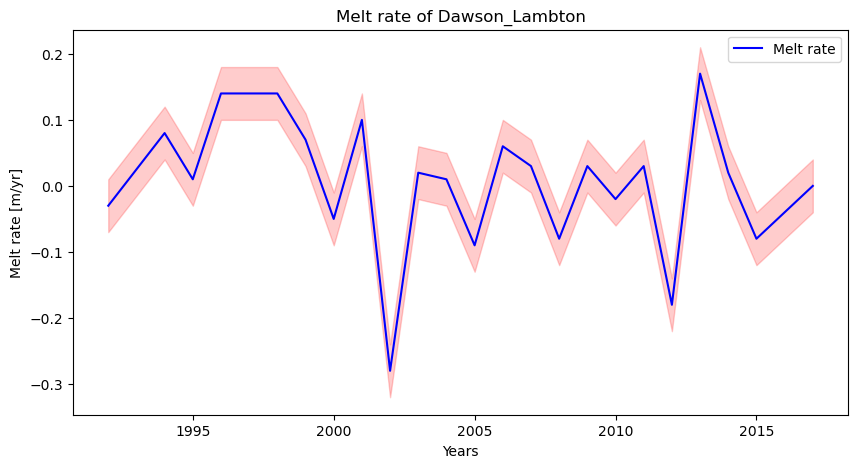

In [4]:
#Print the first time series of the dataset with its error as a shaded area
plt.figure(figsize=(10,5))
plt.plot(Years, Melting_rates[0,:], color='blue', label='Melt rate')
plt.fill_between(Years, Melting_rates[0,:]-errors[0,:], Melting_rates[0,:]+errors[0,:], color='red', alpha=0.2)
plt.xlabel('Years')
plt.ylabel('Melt rate [m/yr]')
plt.title('Melt rate of ' + Glacier[0])
plt.legend()
plt.show()


In [5]:
num_glaciers = len(Glacier)

lin_coeff = np.zeros((num_glaciers,2))
lin_reg = np.zeros((num_glaciers,len(Years)))
r_2 = np.zeros(num_glaciers)

In [6]:
'''

#All the glaciers plot
with PdfPages('Glaciers.pdf') as pdf:
    for i in range(0, len(Glacier)):

        fig = plt.figure()
    
        #Linear regression
        lin_coeff[i,:] = np.polyfit(Years, Melting_rates[i,:], 1)
        lin_reg[i,:] = np.polyval(lin_coeff[i,:], Years)
        r_2[i] = r2_score(Melting_rates[i,:], lin_reg[i,:])

        #Plotting
        plt.scatter(Years, Melting_rates[i,:],label = Glacier[i] + ' Melting rate measurements', s = 1)
        plt.plot(Years, lin_reg[i,:],label = Glacier[i] + ' linear regression' + 'Lineat trend: ' + str(round(lin_coeff[i,0],3)) + ' m/yr')
        plt.fill_between(Years, Melting_rates[i,:]-errors[i,:], Melting_rates[i,:]+errors[i,:], color='red', alpha=0.2)

        plt.legend()
        plt.xlabel('Years')
        plt.ylabel('Melting rates')

        #In the title I want to print the R2 value, rounded with 2 decimals
        plt.title('Melting rates of ' + Glacier[i] + ', R2 = ' + str(round(r_2[i],3)) )




        pdf.savefig(fig) 
        plt.close()

'''

"\n\n#All the glaciers plot\nwith PdfPages('Glaciers.pdf') as pdf:\n    for i in range(0, len(Glacier)):\n\n        fig = plt.figure()\n    \n        #Linear regression\n        lin_coeff[i,:] = np.polyfit(Years, Melting_rates[i,:], 1)\n        lin_reg[i,:] = np.polyval(lin_coeff[i,:], Years)\n        r_2[i] = r2_score(Melting_rates[i,:], lin_reg[i,:])\n\n        #Plotting\n        plt.scatter(Years, Melting_rates[i,:],label = Glacier[i] + ' Melting rate measurements', s = 1)\n        plt.plot(Years, lin_reg[i,:],label = Glacier[i] + ' linear regression' + 'Lineat trend: ' + str(round(lin_coeff[i,0],3)) + ' m/yr')\n        plt.fill_between(Years, Melting_rates[i,:]-errors[i,:], Melting_rates[i,:]+errors[i,:], color='red', alpha=0.2)\n\n        plt.legend()\n        plt.xlabel('Years')\n        plt.ylabel('Melting rates')\n\n        #In the title I want to print the R2 value, rounded with 2 decimals\n        plt.title('Melting rates of ' + Glacier[i] + ', R2 = ' + str(round(r_2[i],3)) )

In [7]:

'''

#I copied the dataframe in order to sort it
df_sort = df
# I add acolumn with the mean of the melting rates in second position
df_sort.insert(1, 'Mean', df_sort.mean(axis=1))
mean = df_sort['Mean'].values

# Sort according to mean of melting rates
df_sort = df_sort.sort_values(by=['Mean'], ascending=False)

#We start from second position since the second colun is the mean
Melting_rates_sort = df_sort.values[:,2:]
Glacier_sort = df_sort.values[:,0]

Melting_rates_sort 
#Convert to numpy array
Melting_rates_sort = np.array(Melting_rates_sort, dtype=np.float32)

for i in range(0, 5):
    plt.plot(Years, Melting_rates_sort[i,:],label=Glacier_sort[i])
plt.legend()
plt.xlabel('Years')
plt.ylabel('Melting rates')
plt.title('Melting rates of the 5 faste glaciers in Antartica')
plt.show()

'''

"\n\n#I copied the dataframe in order to sort it\ndf_sort = df\n# I add acolumn with the mean of the melting rates in second position\ndf_sort.insert(1, 'Mean', df_sort.mean(axis=1))\nmean = df_sort['Mean'].values\n\n# Sort according to mean of melting rates\ndf_sort = df_sort.sort_values(by=['Mean'], ascending=False)\n\n#We start from second position since the second colun is the mean\nMelting_rates_sort = df_sort.values[:,2:]\nGlacier_sort = df_sort.values[:,0]\n\nMelting_rates_sort \n#Convert to numpy array\nMelting_rates_sort = np.array(Melting_rates_sort, dtype=np.float32)\n\nfor i in range(0, 5):\n    plt.plot(Years, Melting_rates_sort[i,:],label=Glacier_sort[i])\nplt.legend()\nplt.xlabel('Years')\nplt.ylabel('Melting rates')\nplt.title('Melting rates of the 5 faste glaciers in Antartica')\nplt.show()\n\n"

[43 61 67 68 69 71]
['Getz_2' 'Venable' 'Pine_Island' 'Thwaites' 'Crosson' 'Dotson']


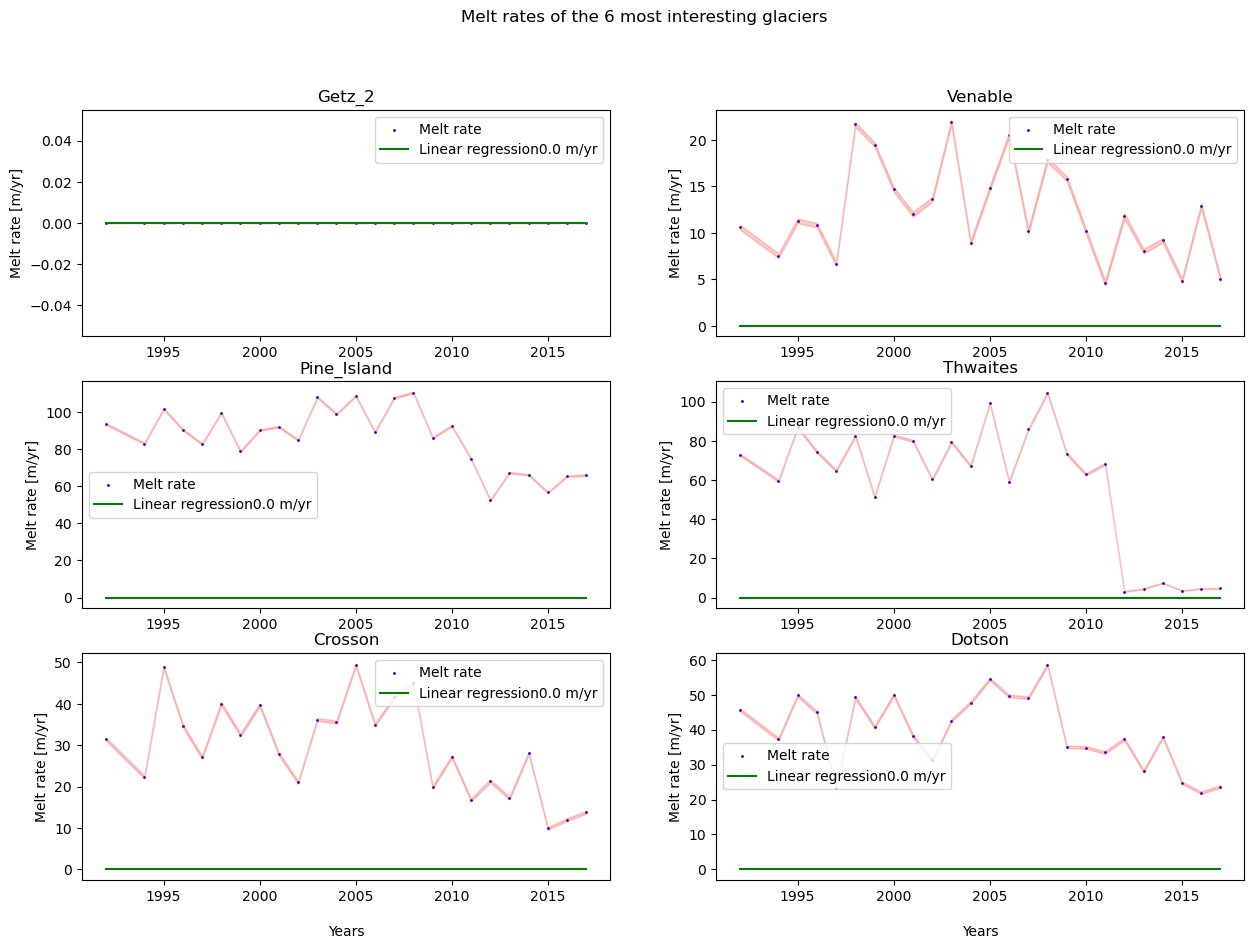

In [8]:
#I select the most interesting glaciers

interesting_glaciers = ['Pine_Island', 'Thwaites', 'Crosson', 'Dotson', 'Getz_2', 'Venable']
interesting_indices = np.where(np.isin(Glacier, interesting_glaciers))[0]

print(interesting_indices)
print(Glacier[interesting_indices])
len(Glacier[interesting_indices])

#Plot of the most interesting glaciers with linear regression and error

fig, axs = plt.subplots(3, 2, figsize=(15,10))
fig.suptitle('Melt rates of the 6 most interesting glaciers')


for i in range(len(interesting_indices)):
    axs[i//2,i%2].scatter(Years, Melting_rates[interesting_indices[i],:], color='blue', label='Melt rate', s=1)
    axs[i//2,i%2].plot(Years, lin_reg[interesting_indices[i],:], color='green', label='Linear regression' + str(round(lin_coeff[interesting_indices[i],0],3)) + ' m/yr')
    axs[i//2,i%2].fill_between(Years, Melting_rates[interesting_indices[i],:]-errors[interesting_indices[i],:], Melting_rates[interesting_indices[i],:]+errors[interesting_indices[i],:], color='red', alpha=0.2)
    axs[i//2,i%2].set_title(Glacier[interesting_indices][i])
    axs[i//2,i%2].set_xlabel('Years')
    axs[i//2,i%2].set_ylabel('Melt rate [m/yr]')
    axs[i//2,i%2].legend()
    axs[i//2,i%2].xaxis.set_label_coords(0.5, -0.2)

#PDF
plt.savefig('Interesting_glaciers.pdf', bbox_inches='tight', dpi=300)
plt.show()


In [9]:
import glob
import pandas as pd
import os
from shapely.geometry import shape
import csv
#from mapxy import mapxy
import pyproj
#from ps_latlon_conversion import xyscale_south
import pyproj
#import ogr
from osgeo import gdal, osr
import matplotlib.pyplot as plt
import fiona
import rasterio
import rasterio.transform
import rasterio.mask
from fiona import Feature, Geometry
from shapely.geometry import mapping, shape
#from read_tiff import read_tiff
# Open the geotiff file
years=np.arange(1992,2018)

In [10]:
Romain Code


'''
for year in years:
    file_tif="/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/THICKNESS_Paolo/GEOTIFF/MELT/melt_"+str(year)+".tif"
    a = gdal.Open("/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/THICKNESS_Paolo/GEOTIFF/MELT/melt_"+str(year)+".tif")
    print("/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/THICKNESS_Paolo/GEOTIFF/MELT/melt_"+str(year)+".tif")
    band=a.GetRasterBand(1)
# region Get the projection information
    proj_wkt = a.GetProjection()
    in_proj = pyproj.CRS.from_wkt(proj_wkt)
# endregion
    # region Create the output projection
    out_proj = pyproj.CRS.from_epsg(4326)

    melt=rasterio.open("/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/THICKNESS_Paolo/GEOTIFF/MELT/melt_"+str(year)+".tif")
    # endregion
    
    # region Open the shapefile
    shapefile_path = "/mnt/data/millanr1/DATA_SERVER/ANTARCTICA/OCEANICE/SHP_JB/ice_shelf.shp"
    shapefile_ds = ogr.Open(shapefile_path)

    shapefile=fiona.open(shapefile_path)
    # endregion
    
    # List to store latitude and longitude coordinates
    lat_lon_coords = []

    
    ME_Gt_list=[]
    names_list=[]
    for feature in shapefile:
        name=feature['properties']['name']
        geometry=feature['geometry']
        id=feature['id']

        bounds=shape(geometry).bounds
        xmin=bounds[0];ymin=bounds[1];xmax=bounds[2];ymax=bounds[3]
        print(xmin,ymin,xmax,ymax)
        os.system('gdalwarp -t_srs EPSG:3031 -te '+str(xmin)+' '+str(ymin)+' '+str(xmax)+' '+str(ymax)+' '+file_tif+' '+id+'_temp.tif')

'''

SyntaxError: invalid syntax (670541447.py, line 1)

In [11]:
#get information from the shp file, without creating the output

path_to_tif = '/Users/francesco/Desktop/Data/GEOTIFFs/'
shapefile_path = '/Users/francesco/Desktop/Data/ice_shelf.shp'

Names = []
lat_lon_coords = []
regions = []
thicknesses = []
ids = []

#Not useful?
#types = [] it returns all FL
#measures = [] it returns again the name of the ice shelves


#Here i just uses the first tif file to get the information, so 1992
file_tif = path_to_tif + 'melt_' + str(1992) + '_warp_ps.tif'
print(file_tif)


shapefile=fiona.open(shapefile_path)
print(shapefile.schema['properties'])


for feature in shapefile:


    id = feature['id']
    name=feature['properties']['name']
    geometry=feature['geometry']
    region = feature['properties']['regions']
    lat = feature['properties']['latitude']
    lon = feature['properties']['longitude']
    thickness = feature['properties']['thickness_']

    #type = feature['properties']['type']
    #measure = feature['properties']['measures_n']

    bounds=shape(geometry).bounds
    xmin=bounds[0];ymin=bounds[1];xmax=bounds[2];ymax=bounds[3]

    #Taking the info
    ids.append(id)
    Names.append(name)
    lat_lon_coords.append([lat,lon])
    regions.append(region)
    thicknesses.append(thickness)

    #types.append(type)
    #measures.append(measure)


/Users/francesco/Desktop/Data/GEOTIFFs/melt_1992_warp_ps.tif
{'id': 'int:10', 'name': 'str:30', 'regions': 'str:11', 'type': 'str:2', 'is_index': 'int:10', 'ice_shelf_': 'str:50', 'measures_n': 'str:50', 'latitude': 'float:24.15', 'longitude': 'float:24.15', 'thickness_': 'float:24.15', 'thicknes_1': 'float:24.15', 'smb_mean_9': 'float:24.15', 'smb_mean_1': 'float:24.15', 'ss_gl_flux': 'float:24.15', 'ss_gl_fl_1': 'float:24.15', 'ss_calving': 'float:24.15', 'ss_calvi_1': 'float:24.15', 'model_gl_f': 'float:24.15', 'instant_co': 'float:24.15', 'mass_loss_': 'float:24.15', 'mass_los_1': 'float:24.15', 'mass_los_2': 'float:24.15', 'mass_los_3': 'float:24.15', 'mass_los_4': 'float:24.15', 'mass_los_5': 'float:24.15', 'mass_los_6': 'float:24.15', 'mass_los_7': 'float:24.15', 'mass_los_8': 'float:24.15', 'mass_los_9': 'float:24.15', 'mass_los10': 'float:24.15', 'mass_los11': 'float:24.15', 'mass_los12': 'float:24.15', 'mass_los13': 'float:24.15', 'mass_los14': 'float:24.15', 'mass_los15': 'f

In [12]:
print((ids))
print(len(Names))
print(len(lat_lon_coords))
print(len(regions))
print(len(thicknesses))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

In [ ]:
#Here I generate the tif files

'''

path_to_tif = '/Users/francesco/Desktop/Data/GEOTIFFs/'
shapefile_path = '/Users/francesco/Desktop/Data/ice_shelf.shp'
#out_put_tif = '/Users/francesco/Desktop/Data exploration/TIF_generated/' Would like to change destination folder, not yet implemented


for year in years:


    #identifying the geotif file in GEOTIFFs directory
    file_tif = path_to_tif + 'melt_' + str(year) + '_warp_ps.tif'
    print(file_tif)

    #a = gdal.Open(file_tif)


    #I tried to change to raster 2, but is an illegal band. Is it ever used?
    #band=a.GetRasterBand(1)
    

# region Get the projection information
    #proj_wkt = a.GetProjection()
    #in_proj = pyproj.CRS.from_wkt(proj_wkt)
# endregion

    # region Create the output projection
    #out_proj = pyproj.CRS.from_epsg(4326)

    #melt=rasterio.open(file_tif)
    # endregion
    
    # region Open the shapefile (IceShelves.v2.9_g1.7.shp in my case)

    shapefile=fiona.open(shapefile_path)
    # endregion


    
    # List to store latitude and longitude coordinates

    for feature in shapefile:

        id = feature['id']
        name=feature['properties']['name']
        geometry=feature['geometry']
        #id=feature['id']

        bounds=shape(geometry).bounds
        xmin=bounds[0];ymin=bounds[1];xmax=bounds[2];ymax=bounds[3]

        print(name)

        # the next command line is saving all the geotiff files in the directory.        
        os.system('gdalwarp -t_srs EPSG:3031 -te '+str(xmin)+' '+str(ymin)+' '+str(xmax)+' '+str(ymax)+' '+file_tif+' '+ id + '_' + str(year) +'.tif')
        

'''


"\n\npath_to_tif = '/Users/francesco/Desktop/Data/GEOTIFFs/'\nshapefile_path = '/Users/francesco/Desktop/Data/ice_shelf.shp'\n#out_put_tif = '/Users/francesco/Desktop/Data exploration/TIF_generated/' Would like to change destination folder, not yet implemented\n\n\nfor year in years:\n\n\n    #identifying the geotif file in GEOTIFFs directory\n    file_tif = path_to_tif + 'melt_' + str(year) + '_warp_ps.tif'\n    print(file_tif)\n\n    #a = gdal.Open(file_tif)\n\n\n    #I tried to change to raster 2, but is an illegal band. Is it ever used?\n    #band=a.GetRasterBand(1)\n    \n\n# region Get the projection information\n    #proj_wkt = a.GetProjection()\n    #in_proj = pyproj.CRS.from_wkt(proj_wkt)\n# endregion\n\n    # region Create the output projection\n    #out_proj = pyproj.CRS.from_epsg(4326)\n\n    #melt=rasterio.open(file_tif)\n    # endregion\n    \n    # region Open the shapefile (IceShelves.v2.9_g1.7.shp in my case)\n\n    shapefile=fiona.open(shapefile_path)\n    # endregion

In [129]:
ids = np.array(ids)

#Here I create the dataset with the tif data, using rasterio

glacier_tif_df = pd.DataFrame(index = ids, columns = years)

file_path_to_gen_tif = '/Users/francesco/Desktop/Data exploration/'

for id in ids:
    
    for year in years:

        file_tif_to_data_set = file_path_to_gen_tif + f"{id}_{year}.tif"

        with rasterio.open(file_tif_to_data_set) as src:
            glacier_tif_df.loc[id, year] = src.read(1)
            #print(type(glacier_tif_df.loc[id, year])) --> it is a numpy array
            #print(len(glacier_tif_df.loc[id, year]))--> chages, from 12 to various numbers, the biggest i saw was `1000`



28.470541 -182.16785


'\ndef update(year):\n    ax.clear()\n    raster_data = g_time_series[year]\n    ax.imshow(raster_data, cmap=\'Blues\', vmin=v_min, vmax=v_max)\n    ax.set_title(f"Glacier number {id_prova}, {Names[id_prova]}, Year: {year}")\n\nfig, ax = plt.subplots()\nfig.colorbar(im, ax=ax)\n\n\n\n\nanim = animation.FuncAnimation(fig, update, frames=years, interval=1000)\n\nanim.save(\'glacier_prova.gif\', writer=\'imagemagick\')\n\n'

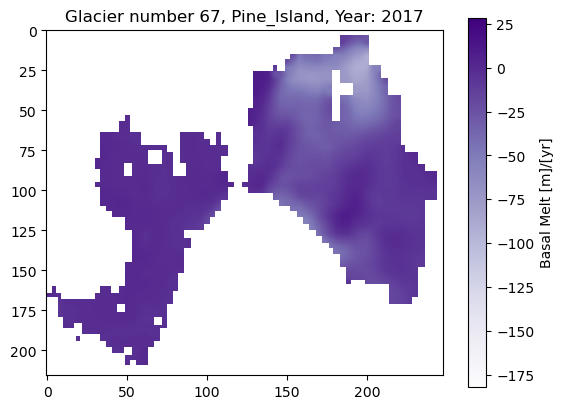

In [193]:
#Trying to make a film


id_prova = 67
time = np.arange(0,26,1)


g_time_series = glacier_tif_df.iloc[id_prova]# here we are looking at the index


#convert the pandas series to a numpy array
g_time_num = g_time_series.values
#print(g_time_num[0])
#print(np.nanmax(g_time_num[0]))


#in this part i find the max and min, in order to do a proper plot
v_max = 0
v_min = 0

for y in time:
    max_temp = np.nanmax(g_time_num[y])
    min_temp = np.nanmin(g_time_num[y])
    #print(max_temp)
    if max_temp > v_max:
        v_max = max_temp
    if min_temp < v_min:
        v_min = min_temp    

print(v_max , v_min) 


fig, ax = plt.subplots()
im = ax.imshow(g_time_num[0], cmap= 'Purples', vmin=v_min, vmax=v_max)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Basal Melt [m]/[yr]')
frames = []

for y in range(len(time)):
    im.set_data(g_time_num[y])
    ax.set_title(f"Glacier number {id_prova}, {Names[id_prova]}, Year: {years[y]}")
    #cbar.set_clim(v_min, v_max)
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(frame)

imageio.mimsave('glacier_prova.gif', frames, fps=2)




'''
